In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import Model, layers
from glob import glob
from PIL import Image
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential


os.environ["CUDA_VISIBLE_DEVICES"] = "1"

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
# GPU 할당 상태 확인

tf.test.is_gpu_available()

2022-06-02 08:12:37.963957: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-06-02 08:12:41.429484: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-06-02 08:12:42.089631: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-06-02 08:12:42.089661: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-06-02 08:12:42.120057: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-06-02 08:12:42.136906: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.so.10
2022-06-02 08:12:42.140889: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcurand.so

True

this does not guarantee that XLA will be used). Devices:
2022-06-02 08:12:42.273147: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-06-02 08:12:42.519266: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1e8f8b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-06-02 08:12:42.519307: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): GeForce GTX 1080 Ti, Compute Capability 6.1
2022-06-02 08:12:42.521332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-06-02 08:12:42.521376: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-06-02 08:12:42.521415: I tensorflow/st

In [2]:
# # 파일 압축 해제 및 class별 폴더 생성

# local_zip = './스쿠버의집.zip'

# zip_ref = zipfile.ZipFile(local_zip, 'r')

# zip_ref.extractall('./scubhome')
# zip_ref.close()

# local_zip = './오스테리아57.zip'

# zip_ref = zipfile.ZipFile(local_zip, 'r')

# zip_ref.extractall('./osteria')
# zip_ref.close()

(16200, 200, 200, 3) (16200,)
(12960, 200, 200, 3) (3240, 200, 200, 3)
(12960,) (3240,)


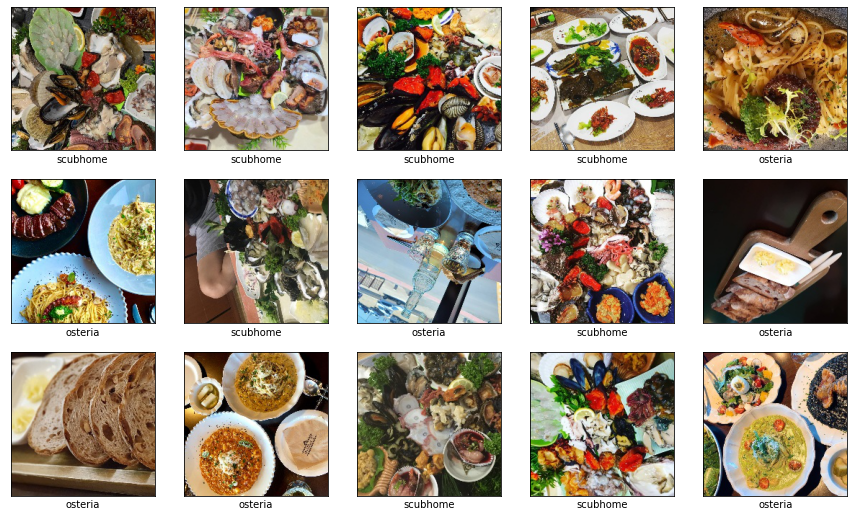

In [3]:
# 데이터 packing

imagesize_w, imagesize_h = 200, 200

image_dates_cat = glob('./scubhome/*.jpg')
image_dates_dog = glob('./osteria/*.jpg')
class_name = ['scubhome', 'osteria']
dic = {'scubhome' : 0, 'osteria' : 1}

X = []
Y = []

for imagename in image_dates_cat:
    image = Image.open(imagename)
    image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X.append(image)
    Y.append(0)
    
for imagename in image_dates_dog:
    image = Image.open(imagename)
    image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X.append(image)
    Y.append(1)    

    
X = np.array(X)
Y = np.array(Y)

print(X.shape, Y.shape)

train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size = 0.2,
                                                                        shuffle = True, random_state = 44)

print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]

plt.figure(figsize = (15, 9))

# train data image 확인

for i in range(15):
    img_idx = np.random.randint(0, N_TRAIN)
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(train_images[img_idx])
    plt.xlabel(class_name[train_labels[img_idx]])

In [4]:
#데이터 클래스가 잘 나뉘었는지 확인

unique, counts = np.unique(np.reshape(train_labels, (N_TRAIN,)), axis = -1, return_counts = True)
dict(zip(unique, counts))

{0: 6374, 1: 6586}

In [5]:
#min-max scaling

train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

x_train = train_images
x_test = test_images

y_train = train_labels
y_test = test_labels

print('train data : X ', x_train.shape, ' Y ', y_train.shape)
print('test data : X ', x_test.shape, ' Y ', y_test.shape)

#데이터 전처리

all_digits = np.concatenate([x_train, x_test], axis = 0)
all_labels = np.concatenate([y_train, y_test], axis = 0)

all_digits = np.reshape(all_digits, (-1, imagesize_w, imagesize_h, 3))
all_labels = keras.utils.to_categorical(all_labels, len(dic))

# tensorflow dataset으로 변환
batch_size = 128

dataset = tf.data.Dataset.from_tensor_slices((all_digits, all_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

print(f"Shape of training images: {all_digits.shape}")
print(f"Shape of training labels: {all_labels.shape}")

data = [x_train, y_train, x_test, y_test]

train data : X  (12960, 200, 200, 3)  Y  (12960,)
test data : X  (3240, 200, 200, 3)  Y  (3240,)
Shape of training images: (16200, 200, 200, 3)
Shape of training labels: (16200, 2)


2022-06-02 08:13:38.664977: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-06-02 08:13:38.665025: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-06-02 08:13:38.665062: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-06-02 08:13:38.665082: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.so.10
2022-06-02 08:13:38.665100: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcurand.so.10
2022-06-02 08:13:38.665119: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcusolv

In [6]:
def train(net, x_train, y_train, x_test, y_test):
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
    net.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])
    result = net.fit(x_train, y_train, epochs = 5, batch_size = 128,
                     validation_data = (x_test, y_test), verbose = 1)
    
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['train', 'validation'], loc = 'best')
    plt.show()

def make_conv_block(num_filters, filter_size, stride, padding = 'same', input_shape = None):
    conv_block = Sequential()
    conv_block.add(layers.Conv2D(num_filters,
                                 filter_size,
                                 strides = stride,
                                 padding = padding,
                                 activation = 'relu'))
    
    conv_block.add(layers.Conv2D(num_filters,
                                 filter_size,
                                 strides = stride,
                                 padding = padding,
                                 activation = 'relu'))
    
    conv_block.add(layers.Conv2D(num_filters,
                                 filter_size,
                                 strides = stride,
                                 padding = padding,
                                 activation = 'relu'))
    
    return conv_block


class CNN(Model):
    def __init__(self, num_classes = 10):
        super(CNN, self).__init__()
        self.convblock1 = make_conv_block(32, 3, 1)
        self.bn1 = layers.BatchNormalization()
        self.convblock2 = make_conv_block(32, 3, 1)
        self.maxpool1 = layers.MaxPool2D(pool_size = 3,
                         strides = 2,
                         padding = 'same')
        
        self.convblock3 = make_conv_block(64, 3, 1)
        self.bn2 = layers.BatchNormalization()
        self.convblock4 = make_conv_block(64, 3, 1)
        self.maxpool2 = layers.MaxPool2D(pool_size = 3,
                         strides = 2,
                         padding = 'same')
        
        self.convblock5 = make_conv_block(32, 3, 1)
        self.bn3 = layers.BatchNormalization()
        self.convblock6 = make_conv_block(32, 3, 1)
        self.maxpool3 = layers.MaxPool2D(pool_size = 3,
                         strides = 2,
                         padding = 'same')
        
        self.flatten = layers.Flatten()
        
        self.fc1 = layers.Dense(128, activation = 'relu')
        self.fc2 = layers.Dense(64, activation = 'relu')
        
        self.fc3 = layers.Dense(num_classes, activation = 'softmax')
        
    
    def call(self, x):
        x = self.convblock1(x)
        x = self.bn1(x)
        x = self.convblock2(x)
        x = self.maxpool1(x)
        
        x = self.convblock3(x)
        x = self.bn2(x)
        x = self.convblock4(x)
        x = self.maxpool2(x)
        
        x = self.convblock5(x)
        x = self.bn3(x)
        x = self.convblock6(x)
        x = self.maxpool3(x)
        
        
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.fc2(x)
        
        x = self.fc3(x)
        
        return x



2022-06-02 08:13:43.074560: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 6220800000 exceeds 10% of free system memory.


Epoch 1/5


2022-06-02 08:13:47.496370: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2022-06-02 08:13:47.853073: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudnn.so.7
2022-06-02 08:13:49.485970: W tensorflow/stream_executor/gpu/asm_compiler.cc:81] Running ptxas --version returned 256
2022-06-02 08:13:49.884305: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


102/102 [==============================] - 194s 2s/step - loss: 0.2887 - accuracy: 0.8642 - val_loss: 1.9404 - val_accuracy: 0.5059
Epoch 2/5
102/102 [==============================] - 74s 722ms/step - loss: 0.0931 - accuracy: 0.9655 - val_loss: 3.7919 - val_accuracy: 0.5059
Epoch 3/5
102/102 [==============================] - 74s 723ms/step - loss: 0.0759 - accuracy: 0.9718 - val_loss: 6.3385 - val_accuracy: 0.5059
Epoch 4/5
102/102 [==============================] - 74s 723ms/step - loss: 0.0526 - accuracy: 0.9814 - val_loss: 7.8309 - val_accuracy: 0.5059
Epoch 5/5
102/102 [==============================] - 74s 724ms/step - loss: 0.0358 - accuracy: 0.9876 - val_loss: 8.2990 - val_accuracy: 0.5059


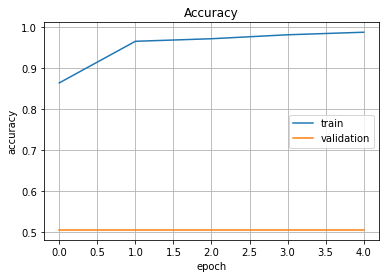

In [7]:
cnn = CNN(num_classes = len(dic))
train(cnn, *data)

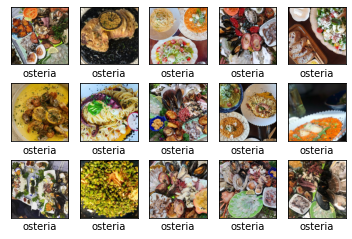

In [23]:
# 학습 결과 labeling

for i in range(15):
    img_idx = np.random.randint(0, N_TRAIN)
    im = np.reshape(train_images[img_idx], (-1, imagesize_w, imagesize_h, 3))
    classnum = np.argmax(cnn.predict(im))
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(train_images[img_idx])
    name = ''
    if classnum == 0 : name = 'scuba'
    else : name = 'osteria'
    plt.xlabel(name)